In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

In [10]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
churn_data = churn_data.drop(['RowNumber'], axis=1)# Удаляем не нужный столбец
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### <center> Задание 9.1

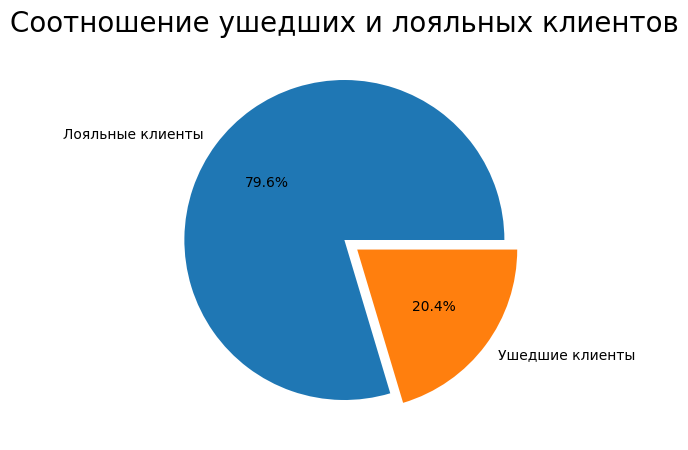

In [12]:

total_exited = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(4, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    total_exited,
    labels = ['Лояльные клиенты', 'Ушедшие клиенты', ],
    autopct='%.1f%%',
    explode = [0, 0.1]
    

);
axes.set_title('Cоотношение ушедших и лояльных клиентов', fontsize = 20);

In [13]:
# По графику выше видно, что число лояльных клиентов больше чем ушедших в 4 раза.

### <center> Задание 9.2

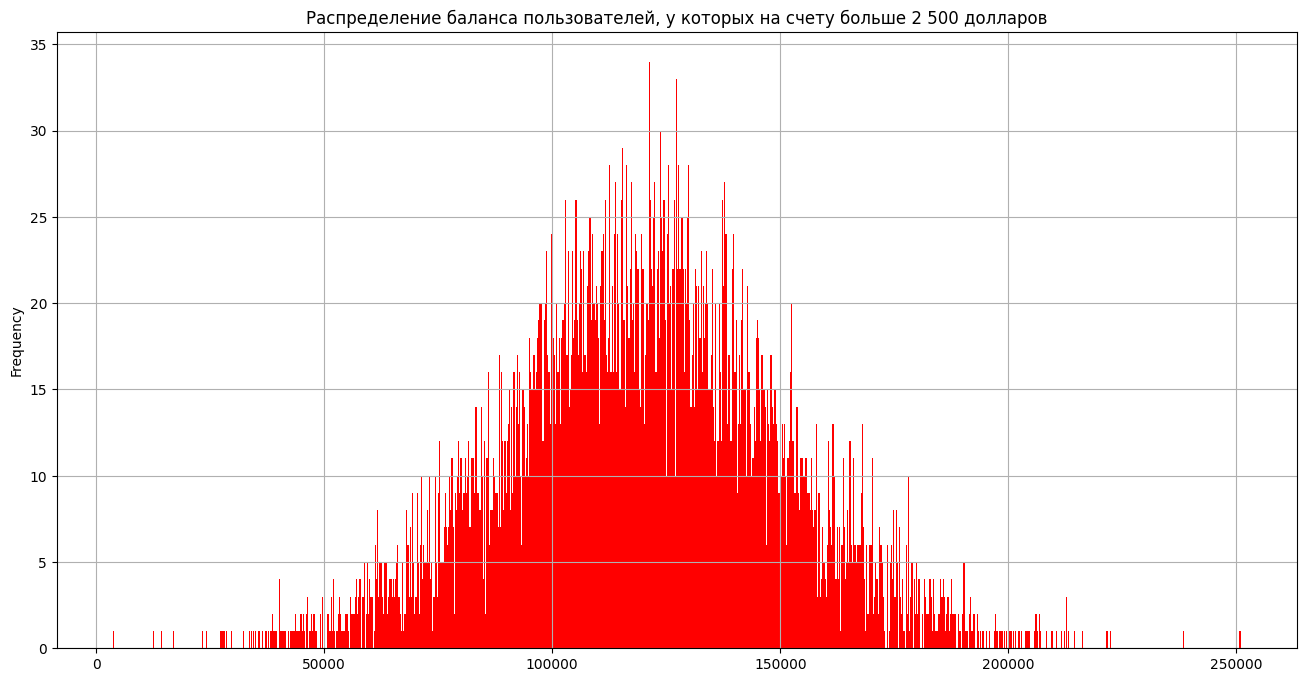

In [17]:
balance = churn_data['Balance'] > 2500 #  Фильтруем клиентов с балансов больше 2500 долларов.
balance = churn_data[balance]['Balance']  # Сортируем по строке баланс.
balance.plot(
    kind= 'hist',
    figsize= (16, 8),
    grid=True,
    bins = 1000,
    color = 'red', 
    title= 'Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
);

In [15]:
# Распределение по форме является нормальным, поэтому это нормальный признак.
# Подавялющее большинство клиентов  имеют на счету больше 50 тыс. дллларов, и меьнше 200 тыс. долларов. У 34 клиентов баланас примерно 12500  долларов. У 33 клиентов немного больлше чем 125000 долларов. Выборосами можно назвать клиента у которго минимальное значени, такое как 3768.69 долларов и максимально значение в 250898.09 долларов соответсвенно.


### <center> Задание № 9.3

In [18]:
fig = px.box(data_frame = churn_data ,
             x='Balance',
             color = 'Exited',
             title = 'Распределение баланса клиента в разрезе признака оттока.',
             width= 1000
             )
fig.data[0].name='ушедшие'
fig.data[1].name='лояльные'
fig.show()

In [ ]:
# # У ушедших клиентов максимальная сумма на счете больше, чем у лояльных на 30тыс. доларов. Медианное значение у лояльных клиентов меньше. 
# Первый квартиль соответсвует минимальному значению, то есть 0 долларов на счету у лояльных клиентов.
# У ушедших клиентов первый квартиль, т.е. 25%, соответсвует 37.8 тыс. долларов.
# Третий квартиль у обоих групп примерно одинаковый, с разницой в 5 тыс долларов больше у ушедших.
# С чем связан уход клиентов?
# Ответ:
# Ушедших клиентов явно больше средсвт на счетах, и меньше минимально значени. Возможно клиентам не выгодно деражть средства в банке из за маньшего процента по вкладам, чем в других.
